<a href="https://colab.research.google.com/github/BLRGoD/Econometrics_labs/blob/main/Econometrics_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xlwt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
import xlrd,xlwt
import numpy as np
from statsmodels.formula.api import ols
from pandas import read_excel
import statsmodels.regression.linear_model as sm
from numpy import ones

In [ ]:
data=read_excel(io="lab_3.xlsx", sheet_name="for_python")
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,64.08,2.0,26010,16.5,6.819509,1.685281,67.9,14.4,4.699190,73.007068
1,61.75,4.3,39626,14.2,9.661749,15.002955,63.8,13.7,6.091993,89.327054
2,64.33,8.8,39739,12.3,6.475306,21.019457,65.2,9.0,4.549040,72.765119
3,64.33,4.1,37810,11.7,5.397807,4.932287,64.9,14.4,5.064369,55.206519
4,65.86,6.2,26833,15.5,5.857014,2.836302,59.4,13.3,5.495210,59.903105


In [ ]:
indep_var=data.drop(columns=['Y'])
indep_var.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,2.0,26010,16.5,6.819509,1.685281,67.9,14.4,4.699190,73.007068
1,4.3,39626,14.2,9.661749,15.002955,63.8,13.7,6.091993,89.327054
2,8.8,39739,12.3,6.475306,21.019457,65.2,9.0,4.549040,72.765119
3,4.1,37810,11.7,5.397807,4.932287,64.9,14.4,5.064369,55.206519
4,6.2,26833,15.5,5.857014,2.836302,59.4,13.3,5.495210,59.903105


In [ ]:
def YX(data, response, vars_x):
    nones = pandas.DataFrame({'Intercept' : ones(data.shape[0])})
    X = nones.join(data.loc[:, vars_x])
    Y = data[response]
    return (Y, X)

In [ ]:
Y, X = YX(data, 'Y', indep_var.columns.tolist())
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     5.277
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.37e-05
Time:                        18:07:26   Log-Likelihood:                -185.06
No. Observations:                  87   AIC:                             390.1
Df Residuals:                      77   BIC:                             414.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.8970      3.636     19.225      0.000      62.657      77.137
X1             0.1578      0.046      3.465      0.001       0.067       0.249
X2          3.363e-05   2.12e-05      1.583      0.117   -8.67e-06    7.59e-05
X3             0.1032      0.072      1.431      0.156      -0.040       0.247
X4            -0.0270      0.084     -0.322      0.749      -0.194       0.140
X5            -0.0158      0.007     -2.404      0.019      -0.029      -0.003
X6            -0.0800      0.046     -1.728      0.088      -0.172       0.012
X7            -0.2541      0.090     -2.837      0.006      -0.432      -0.076
X8             0.0400      0.157      0.255      0.800      -0.273       0.353
X9            -0.0011      0.001     -1.923      0.058      -0.002    3.98e-05
==============================================================================
Omnibus:                       27.588   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.047
Skew:                           1.097   Prob(JB):                     1.24e-14
Kurtosis:                       6.586   Cond. No.                     6.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def backward_elimination(data, response):
    """
    Данная функция позволяет устранить мультиколлениарность методом пошаговой регрессии с исключением переменных.
    Параметры функции:
    ----------
    data : переменная типа pandas DataFrame со всеми возможными объясняющими и результативным признаками
    
    response: строка с названием результативного признака
    
    Фунция возвращает: 
    ----------
    model: линейная модель множественной регрессии без мультиколлениарности
    """
    selected = set(data.columns) 
    selected.remove(response) 
    currentPValues = ols(formula="{} ~ {}".format(response, " + ".join(selected)), data=data).fit().pvalues
    for _ in range(len(data.columns)): 
        currentAdjR2 = -1.0 
        if (max(currentPValues) >= 0.05):
            for i in range(1, len(currentPValues)):
                candidateToRemove = currentPValues.axes[0][i] 
                newModel = ols(formula="{} ~ {}".format(response, " + ".join(selected - set([candidateToRemove]))), data=data).fit()
                newAdjR2 = newModel.rsquared_adj 
                if (currentAdjR2 < newAdjR2):
                    currentAdjR2, deletedVar, improvedPValues = newAdjR2, candidateToRemove, newModel.pvalues
        if (currentAdjR2 == -1.0):
            break
        selected.remove(deletedVar) 
        currentPValues = improvedPValues
    return ols(formula="{} ~ {}".format(response, " + ".join(sorted(selected))), data=data). fit()

backwardModel = backward_elimination(data, "Y")
backwardModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     11.89
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.49e-06
Time:                        18:07:46   Log-Likelihood:                -190.41
No. Observations:                  87   AIC:                             388.8
Df Residuals:                      83   BIC:                             398.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.1918      1.276     53.456      0.000      65.655      70.729
X1             0.1361      0.045      3.016      0.003       0.046       0.226
X5            -0.0118      0.006     -2.039      0.045      -0.023      -0.000
X7            -0.3203      0.088     -3.630      0.000      -0.496      -0.145
==============================================================================
Omnibus:                       45.649   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.989
Skew:                           1.610   Prob(JB):                     4.10e-41
Kurtosis:                       9.398   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X=np.copy(backwardModel.model.exog)
Y=np.copy(backwardModel.model.endog)
n=X.shape[0]-1 #количество измерений
k=X.shape[1]-1 #количесво объясняющих переменных

In [ ]:
import statsmodels.regression.linear_model as sm

result=sm.OLS(Y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     11.89
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.49e-06
Time:                        18:09:24   Log-Likelihood:                -190.41
No. Observations:                  87   AIC:                             388.8
Df Residuals:                      83   BIC:                             398.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.1918      1.276     53.456      0.000      65.655      70.729
x1             0.1361      0.045      3.016      0.003       0.046       0.226
x2            -0.0118      0.006     -2.039      0.045      -0.023      -0.000
x3            -0.3203      0.088     -3.630      0.000      -0.496      -0.145
==============================================================================
Omnibus:                       45.649   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.989
Skew:                           1.610   Prob(JB):                     4.10e-41
Kurtosis:                       9.398   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
E=backwardModel.resid

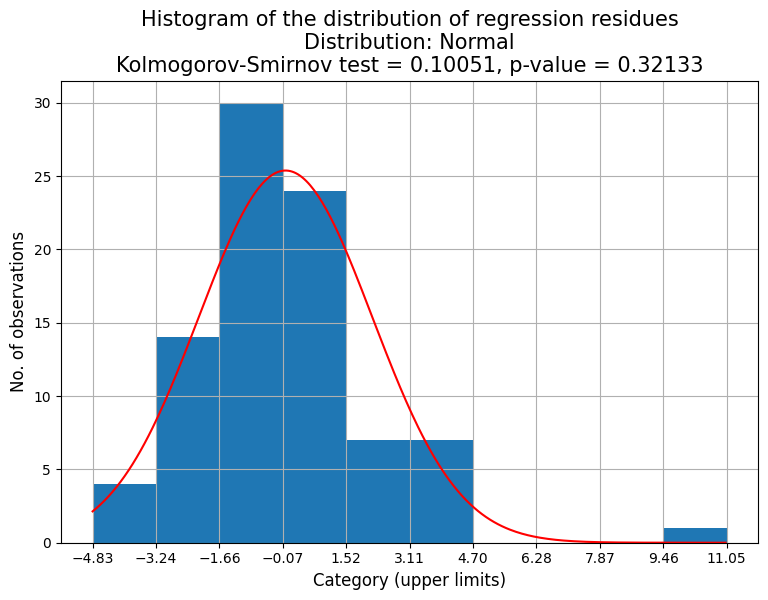

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from numpy import arange
#зададим размер гистограммы
plt.figure(figsize=(9, 6))
# построим гистограмму остатков
histData = plt.hist(E)
#построим красную линию, соответсвующую ожидаемому нормальному распределению
range_ = arange(min(E), max(E), 0.05)
coefY = len(E) * (histData[1][1] - histData[1][0])
plt.plot(range_,
         [norm(E.mean(),E.std()).pdf(x) * coefY for x in range_],
         color='r')
#наненсем деления оси абцисс
plt.xticks(histData[1])
#проведем тест К-С
KS_maxD, KS_PValue = kstest(E, cdf='norm', args=(E.mean(), E.std()))
#название гистограммы
plt.title("Histogram of the distribution of regression residues\n" +
          "Distribution: Normal\n" +
          "Kolmogorov-Smirnov test = {:.5}, p-value = {:.5}".format(KS_maxD, KS_PValue), fontsize=15)
#подпись осей
plt.ylabel("No. of observations", fontsize=12)
plt.xlabel("Category (upper limits)", fontsize=12)
plt.grid()
plt.show()

88
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]


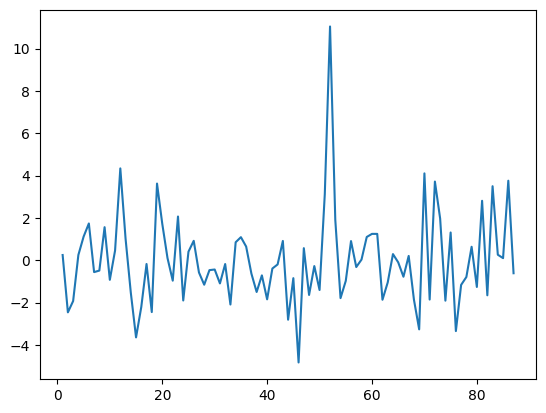

In [ ]:
import math
import pylab
import matplotlib.pyplot as plt
xmin=1
xmax=Y.shape[0]+1
print (xmax)
dx=1
xlist=np.arange(xmin,xmax,dx)
print (xlist)
ylist=E
plt.plot(xlist,ylist)
plt.show()

In [ ]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(backwardModel.resid)

1.8364434138825327

In [ ]:
eps=0.001
r_new = 10
E=backwardModel.resid
E = E[:,np.newaxis]
Ye=np.copy(E[1:])
Xe=np.copy(E[:n])
for i in range (0,2):
    r=1/np.dot(Xe.T,Xe)*(np.dot(Xe.T,Ye))
    Cov = (1/(1-r**2))*((-r)*np.eye(n+1,n+1,-1)+(1+r**2)*np.eye(n+1,n+1,0)+(-r)*np.eye(n+1,n+1,1))
    Cov[0,0]=1
    Cov[n,n]=1
    b_new=np.linalg.inv(np.dot(X.T,Cov).dot(X)).dot(np.dot(X.T,Cov)).dot(Y)
    e_new = Y - np.dot(X,b_new)
    Ye = np.copy(e_new[1:])
    Ye = Ye[:,np.newaxis]
    Xe = np.copy(e_new[:n])
    Xe = Xe[:,np.newaxis]
    if (abs(r_new - r[0][0])<= eps):
        break
    r_new = r[0][0]
s = pandas.Series(b_new)
s

<ipython-input-18-09eb77c0393c>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  E = E[:,np.newaxis]


0    68.046273
1     0.132019
2    -0.012725
3    -0.305027
dtype: float64

In [ ]:
S = ((Y-X.dot(b_new)).T.dot(Cov).dot(Y-X.dot(b_new)))*(1/(n-k))
Eb = S*np.linalg.inv(np.dot(X.T,Cov).dot(X))
#ковариационная матрица для bомнк

d = {"Std": np.sqrt(np.diagonal(Eb))}
df = pandas.DataFrame(data=d)
df

,Std
0,1.262887
1,0.044492
2,0.005734
3,0.087594


In [ ]:
from scipy.stats import f 
Fkr = f.ppf (0.95,X.shape[1]-1,X.shape[0]-1)
Y = X.dot(b_new)
Qost = e_new.T.dot(e_new)
Qfact = (Y - np.mean(Y)).T.dot(Y - np.mean(Y))
R2=Qfact/(Qfact+Qost)
print (R2)
F = R2*(n-k)/((1-R2)*k)
print("F(расчетное)=",F,"F(критическое)=", Fkr)
if F>Fkr:
    print('%.3f'%F, ">", '%.3f'%Fkr, "=> Отвергаем гипотезу о незначимости")
else:
    print('{:.3f}'.format(F), "<", '{:.3f}'.format(Fkr), "=> Принимаем гиотезу о незначимости")

0.2904893477008799
F(расчетное)= 11.327345018731927 F(критическое)= 2.7106467710825624
11.327 > 2.711 => Отвергаем гипотезу о незначимости
